In [ ]:
# default_exp data

In [ ]:
import nbdev.showdoc as literacy

In [ ]:
#export
from speechsep.imports import *
from speechsep.core import *
from speechsep.masks import *

In [ ]:
fn = Path("../data")

# DataBlocks
> DataBlock Examples for audio classification and mask generation

In [ ]:
#export
audio_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('audio/'))

def get_audio_files(path, recurse=True, folders=None):
    "Get image files in `path` recursively, only in `folders`, if specified."
    return get_files(path, extensions=audio_extensions, recurse=recurse, folders=folders)

def AudioBlock(cls=AudioBase): return TransformBlock(type_tfms=cls.create, batch_tfms=IntToFloatTensor)

# Classification DataBlocks

In [ ]:
data = DataBlock(blocks=(AudioBlock(AudioMono), CategoryBlock),
                  get_items=get_audio_files,
                  splitter=RandomSplitter(),
                  get_y=parent_label)

## AudioBlock

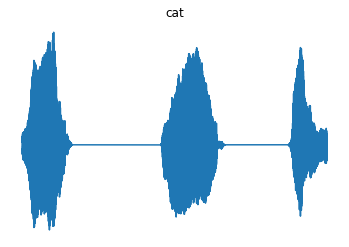

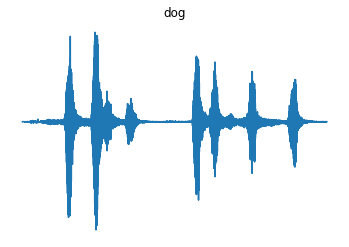

In [ ]:
dbunch = data.databunch(fn, item_tfms=(Resample(22048), Clip(5)), bs=2)

dbunch.show_batch()

## SpecBlock

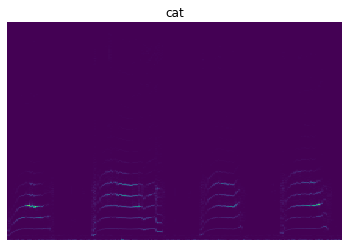

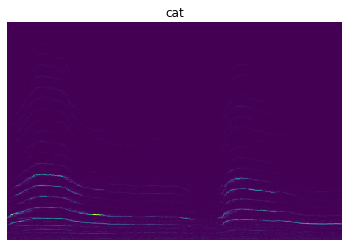

In [ ]:
dbunch = data.databunch(fn, item_tfms=(Resample(22048), Clip(5), Spectify(), PhaseManager()), bs=2)

dbunch.show_batch()

## DecBlock

/home/holydemon/dev/Speech-Separation/nbdev/speechsep/core.py:94: RuntimeWarning: divide by zero encountered in log
  spec.data = np.log(spec.data)


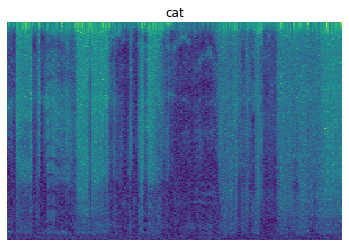

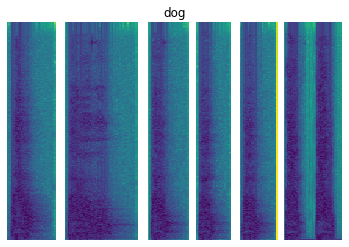

In [ ]:
dbunch = data.databunch(fn, item_tfms=(Resample(22048), Clip(5), Spectify(), Decibelify(), PhaseManager()), bs=2)

dbunch.show_batch()

## MelBlock

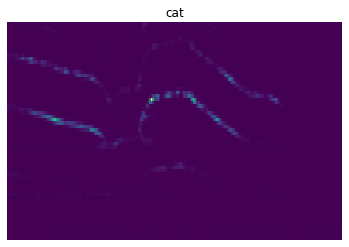

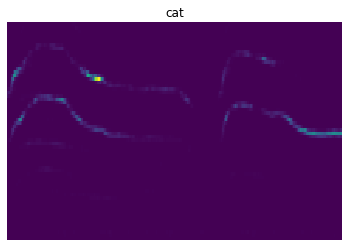

In [ ]:
dbunch = data.databunch(fn, item_tfms=(Resample(22048), Clip(5), Mel_Binify_lib()), bs=2)

dbunch.show_batch()

## Mel-bin/Decibel Block

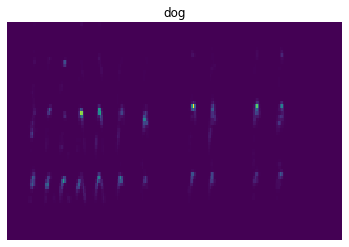

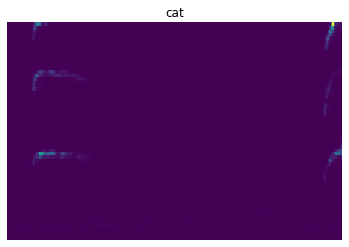

In [ ]:
dbunch = data.databunch(fn, item_tfms=(Resample(22048), Clip(5), Decibelify(), Mel_Binify_lib()), bs=2)

dbunch.show_batch()

### MFCCBlock

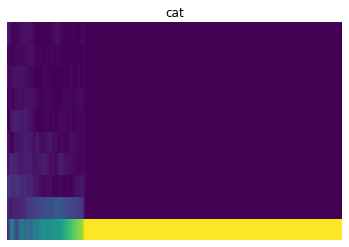

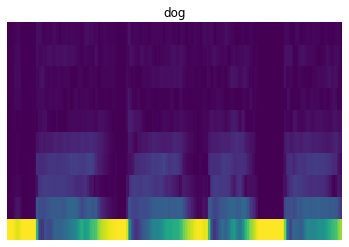

In [ ]:
dbunch = data.databunch(fn, item_tfms=(Resample(22048), Clip(5), MFCCify()), bs=2)

dbunch.show_batch()